In [1]:
import os
import pandas as pd
import spacy 

In [4]:
# data 
reddit_posts= pd.read_csv('/Users/philazar/Desktop/projects/Mar21-vaccine-uptake/data/reddit/reddit_posts.csv')
reddit_comments = pd.read_csv('/Users/philazar/Desktop/projects/Mar21-vaccine-uptake/data/reddit/reddit_comments_cleaned.csv')

In [3]:
reddit_comments.head()

,post_id,comment_id,author,comment,created_utc,downs,ups,reply,comment_replied_id,comment_date
0,ldd0e6,gpcqm3a,t2_16jhc2,My super conservative Southern Baptist MIL is ...,1.614669e+09,0.0,1.0,N,NaN,3/2/21 1:02
1,ldd0e6,gonzgvg,t2_644zai51,Had a nurse claim the vaccine wasn’t real and ...,1.614253e+09,0.0,6.0,N,NaN,2/25/21 5:35
2,ldd0e6,gobfxvn,t2_hh35kpp,"Not an interaction with an antivaxxer, but jus...",1.614007e+09,0.0,6.0,N,NaN,2/22/21 9:19
3,ldd0e6,gobey4f,t2_7gf4ejvg,My grandfather is a Trump-supporting conspirac...,1.614006e+09,0.0,11.0,N,NaN,2/22/21 9:05
4,ldd0e6,go92rh9,t2_h24rn3v,"My anti vaxx, anti mask aunt keeps posting on ...",1.613962e+09,0.0,8.0,N,NaN,2/21/21 20:41


In [80]:
# try to get a Global corpus of comments and then also by subreddit 
global_comments = reddit_comments['comment'].to_list()
comments = '. '.join(global_comments)

In [81]:
comments

'My super conservative Southern Baptist MIL is hella mad at me for getting vaccinated for a few reasons:\n\n1. “Y’all haven’t even begun to have children, who knows what it’s doing to your dna?” Her point was that vaccines cause autism therefore our future children could be autistic since I’ve been vaccinated. As an autistic person with several autistic family members, I had to be the one to break it to her that if our kids are autistic, it’s because there is a genetic predisposition to autism on my side of the family, not because I got vaxxed. \n\n2. “I just don’t trust what the government says.” Fair, I don’t either, which is why I am listening to scientists. \n\n3. “Your FIL’s cousin Mark is a doctor and he said he’s not gonna get the vaccine because he’s not done having kids and he said the other doctors he works with aren’t gonna get vaccinated either.” Okay but why would I listen to Mark - a doctor in buttfuck nowhere Alabama - and his coworkers - also doctors in buttfuck nowhere

In [10]:
nlp = spacy.load("en_core_web_sm")

In [76]:
# do i need to lower case or lemmetize? 
# does it already exist in the pipe?

doc = nlp(comments)

In [77]:
for entity in doc.ents:
    print(entity.text, entity.label_)

1 CARDINAL
2 CARDINAL
3 CARDINAL
hundreds of thousands CARDINAL
the last three weeks DATE
second ORDINAL
today DATE
😚 ORG
this coming week DATE
next week DATE
2)a CARDINAL
today DATE
5000 CARDINAL
hundreds of thousands CARDINAL
one CARDINAL
a few months DATE
er(emt ORG
8 CARDINAL
80s DATE
2 million CARDINAL
one CARDINAL
the other day DATE
first ORDINAL
second ORDINAL
about 14 hours ago TIME
midnight TIME
second ORDINAL
last week DATE
first ORDINAL
first ORDINAL
second ORDINAL
first ORDINAL
first ORDINAL
one CARDINAL
the last year DATE
last year DATE
april DATE
second ORDINAL
11:15 am TIME
5:00 am TIME
second ORDINAL
last week DATE
day DATE
a few days DATE
2nd ORDINAL
a couple of days ago DATE
second ORDINAL
second ORDINAL
an hour TIME
first ORDINAL
1 CARDINAL
this morning TIME
101.6 CARDINAL
today DATE
few years DATE
first ORDINAL
yesterday DATE
afternoon TIME
5 days DATE
2nd ORDINAL
first ORDINAL
second ORDINAL
2/6 CARDINAL
zero CARDINAL
second ORDINAL
7:30 am 2/6 TIME
day 1 DATE
day 

2022 DATE
a full year DATE
nearly 365 days DATE
a few weeks DATE
under age 50 DATE
wednesday DATE
two dozen CARDINAL
this week DATE
12th ORDINAL
covid-19 PERSON
third ORDINAL
10:59 pm the night TIME
1 CARDINAL
3 CARDINAL
friday/saturday DATE
weeks DATE
shot.](https://twitter.com NORP
months DATE
the last 6 months DATE
only 3 minutes TIME
50 CARDINAL
2 hours TIME
62 CARDINAL
under 65 DATE
51 CARDINAL
7 am trying TIME
9 am TIME
7 am on TIME
friday DATE
friday DATE
yesterday DATE
two CARDINAL
65+ QUANTITY
this week DATE
today DATE
minutes TIME
four CARDINAL
under 65 DATE
11pm last night TIME
first ORDINAL
first ORDINAL
today DATE
3k CARDINAL
last week DATE
under 65 DATE
7am-7pm seven days DATE
65 and older and DATE
65 DATE
65 DATE
65 CARDINAL
1a CARDINAL
late night TIME
two CARDINAL
friday DATE
12028 DATE
6429 DATE
\~60 ORG
18 CARDINAL
3,000 CARDINAL
3,000 CARDINAL
270 CARDINAL
3/10 CARDINAL
4085 CARDINAL
3/10 CARDINAL
9:40a - 5:40 DATE
17961 DATE
441 CARDINAL
a few minutes before midnigh

the end of january so DATE
mid-april DATE
4-5 nights DATE
a few years DATE
last year DATE
6 months DATE
8 years DATE
about 30 CARDINAL
two months DATE
march 2020 DATE
march 2nd, 2021 DATE
last year DATE
that week DATE
covid-19 PERSON
a year later DATE
texans NORP
just a few weeks later DATE
a week DATE
about a week DATE
daily DATE
30% PERCENT
41th ORDINAL
🤦 PERSON
third ORDINAL
over a week DATE
a week DATE
covid-19 PERSON
’s NORP
a month DATE
95% PERCENT
between january 24 and february 21 DATE
tuesday DATE
january 18 to 24 DATE
4,439 CARDINAL
215 CARDINAL
february 15 to 21 DATE
third ORDINAL
second ORDINAL
21 days DATE
the end of december DATE
seven days later DATE
third ORDINAL
673 CARDINAL
157 CARDINAL
the last recorded week DATE
15 CARDINAL
five CARDINAL
zero CARDINAL
less than 10 CARDINAL
that week of february 15 DATE
95% PERCENT
covid-19 PERSON
kenya GPE
50 million CARDINAL
1% or 2% PERCENT
kenya GPE
just over 1 million CARDINAL
covid-19 PERSON
first ORDINAL
some 400,000 CARDINAL


In [25]:
# counts by ORG, PERSON, GPE
count_dict = {}
for entity in doc.ents:
    label = entity.label_
    text = entity.text
    if label in ['ORG', 'PERSON', 'GPE']:
        if text not in count_dict.keys():
            count_dict[text] = 1 
        else:
            count_dict[text] += 1 
    

In [26]:
count_dict

{'Southern Baptist MIL': 1,
 'Mark': 1,
 'Alabama': 2,
 '😚': 1,
 'EPIC': 1,
 'Trump': 7,
 'Parler': 1,
 'LOT': 3,
 'ER': 4,
 'Alex Berenson': 1,
 'PPE': 1,
 'Covid Vaccine': 1,
 'Covid vaccines': 1,
 'Covid': 7,
 'Pfizer': 55,
 'TX': 4,
 'USA': 6,
 'Sinopharm': 4,
 'UCI': 1,
 'Moderna': 52,
 'AFAIK': 1,
 'Pfizer/Biontech': 1,
 'Ibuprofen': 1,
 'WHOOP': 1,
 'Microsoft': 1,
 'Lol': 5,
 'Vnn': 1,
 'Felt': 1,
 'GI': 1,
 'Muscogee': 1,
 'Creek': 1,
 'ETA': 2,
 'TDAP': 1,
 'HPV': 3,
 'Dubai': 1,
 'UAE': 1,
 'China': 1,
 'Pfizer-BioNTech': 2,
 'US': 23,
 'NFL': 1,
 'NyQuil': 1,
 'NHS': 1,
 'the Public Health': 1,
 'NP': 2,
 'Howdy': 1,
 'here](https://imgur.com': 1,
 'PIL - Patient Information Leaflet': 1,
 'the SPC (Specification of Product Characteristics': 1,
 'UK': 15,
 'Big Pharma': 1,
 'LOL': 5,
 'Biochem': 1,
 'BScN': 1,
 'NCLEX': 1,
 'Ohno': 1,
 'First World Problem': 1,
 'OPV': 1,
 'India': 10,
 'FSME': 1,
 'KNOW': 1,
 'Peeople': 1,
 'Zuck': 1,
 'Apple': 13,
 'Albert Einstein': 2,
 '

In [27]:
sorted_ = dict(sorted(count_dict.items(), key=lambda item: item[1]))

In [28]:
sorted_

{'Southern Baptist MIL': 1,
 'Mark': 1,
 '😚': 1,
 'EPIC': 1,
 'Parler': 1,
 'Alex Berenson': 1,
 'PPE': 1,
 'Covid Vaccine': 1,
 'Covid vaccines': 1,
 'UCI': 1,
 'AFAIK': 1,
 'Pfizer/Biontech': 1,
 'Ibuprofen': 1,
 'WHOOP': 1,
 'Microsoft': 1,
 'Vnn': 1,
 'Felt': 1,
 'GI': 1,
 'Muscogee': 1,
 'Creek': 1,
 'TDAP': 1,
 'Dubai': 1,
 'UAE': 1,
 'China': 1,
 'NFL': 1,
 'NyQuil': 1,
 'NHS': 1,
 'the Public Health': 1,
 'Howdy': 1,
 'here](https://imgur.com': 1,
 'PIL - Patient Information Leaflet': 1,
 'the SPC (Specification of Product Characteristics': 1,
 'Big Pharma': 1,
 'Biochem': 1,
 'BScN': 1,
 'NCLEX': 1,
 'Ohno': 1,
 'First World Problem': 1,
 'OPV': 1,
 'FSME': 1,
 'KNOW': 1,
 'Peeople': 1,
 'Zuck': 1,
 'Alex': 1,
 'Lmaoooo': 1,
 'Ripley': 1,
 'iPhone': 1,
 'Jacob Wohl': 1,
 'Nike': 1,
 'Applebee': 1,
 'John Stamos': 1,
 'the First Division Mars Corps': 1,
 'JFK': 1,
 'Hoffa': 1,
 'Betteridge': 1,
 'Rinos': 1,
 'Never Trump RINO’s': 1,
 'Darren Soto': 1,
 'https://www.nbcnews.com/

In [30]:
df_wide = pd.DataFrame([sorted_])

In [31]:
df_wide

,Southern Baptist MIL,Mark,😚,EPIC,Parler,Alex Berenson,PPE,Covid Vaccine,Covid vaccines,UCI,...,UK,California,Biden,Florida,COVID-19,US,CVS,Texas,Moderna,Pfizer
0,1,1,1,1,1,1,1,1,1,1,...,15,16,18,19,22,23,27,50,52,55


In [36]:
df_long = df_wide.melt(value_vars=[c for c in df_wide.columns])

In [54]:
df_sorted = df_long.sort_values(['value'], ascending = True)

In [56]:
df_sorted.count()

variable    607
value       607
dtype: int64

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df_sorted.columns = ['Entity', 'Mentions']

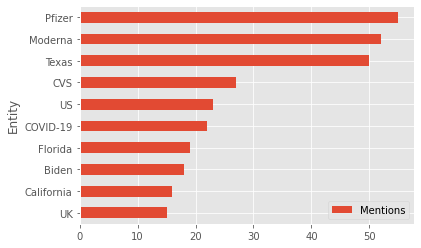

In [67]:
plot = df_sorted.iloc[597:607].plot.barh(x='Entity', y='Mentions', rot=0)

In [68]:
# look into top mentions by subreddit across geographies 
reddit_posts.head()

,post_id,subreddit,title,ups,downs,upvote_ratio,num_comments,author,created_utc,subreddit_subscribers,post_date
0,lxcfv6,CoronavirusWA,Hey teachers... I was just able to score an ap...,95,0,0.95,10,t2_b4hju,1.614832e+09,66503,3/3/21 22:18
1,lwyn8o,CoronavirusWA,"Today, Washington becomes the 6th US state and...",720,0,0.98,110,t2_3tu35,1.614791e+09,66503,3/3/21 10:59
2,lxalq7,CoronavirusWA,"As of today, Gov. Inslee says there have been ...",38,0,0.86,0,t2_nj2ph,1.614825e+09,66503,3/3/21 20:34
3,lxcsfu,CoronavirusWA,Tips on getting a COVID vaccine appointment,7,0,1.00,1,t2_37skz,1.614833e+09,66503,3/3/21 22:41
4,lwxg79,CoronavirusWA,I keep seeing comments regarding the difficult...,50,0,0.91,22,t2_mr4dp,1.614788e+09,66503,3/3/21 10:09
